<a href="https://colab.research.google.com/github/yudhiesh1997/RedWineQuality/blob/master/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality Dataset 

The dataset is compromised of 11 dependent variables and a single independent variable which is the Wine Quality.

This is a classification problem where we have to predict the class of the quality of the wine in a certain range but regression can be used as well for this as we would still have to predict a single continous value. 

[Dataset URL](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import seaborn as sns 
import pandas as pd

In [12]:
df = pd.read_csv("/content/drive/My Drive/winequality-red 3.csv")

## **Data Preprocessing and Exploratory Data Analysis**

Data preprocessing is done to check if the data is in the suitable format that will be needed for a model to make any inferences on. Some data preprocessing steps include :
1. Cleaning the data
2. Checking for null values 

We will be analysing the dataset by trying to see if there are relationships we can understand that can help with the final prediction. 




In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **Data has no missing values**

Now we will find the categorical, numerical and temporal features if they exist so that they can be used to plot the relationships between them and the target variable

In [18]:
numerical_features = [feat for feat in df.columns if df[feat].dtypes != "O"]
print(f'Numerical features: \n{numerical_features}')

Numerical features: 
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [17]:
categorical_features = [feat for feat in df.columns if df[feat].dtypes == "O"]
print(f'Categorical features: \n{categorical_features}')

Categorical features: 
[]


### There are only numerical features in this dataset 

### **Numerical Features:**

Numerical variables are made up of Continous and Discrete values

Continous variables have no range and can make up any number whereas discrete variables have some sort of range to them i.e., there are 12 possibillities when rolling a dice.

We will plot the relationship between each of these features with the target feature.

As the data is made up of only numerical data we will plot each of them against the Quality to see if there is any trend between the variables. 

In [23]:
# Plot independent variable against the dependent variables

def plot_(dataset, features):
  for feature in features:
    if feature != 'quality':
      fig = plt.figure(figsize = (10,6))
      sns.barplot(x = 'quality', y = feature, data = dataset)

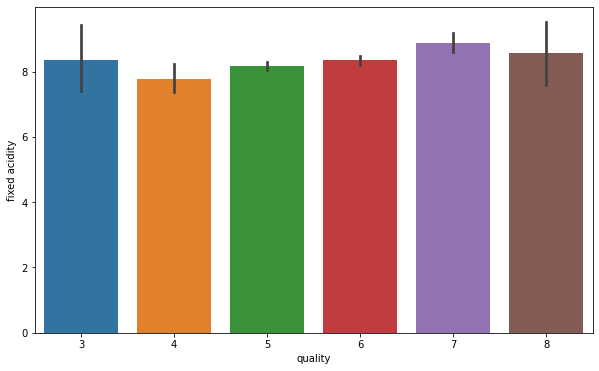

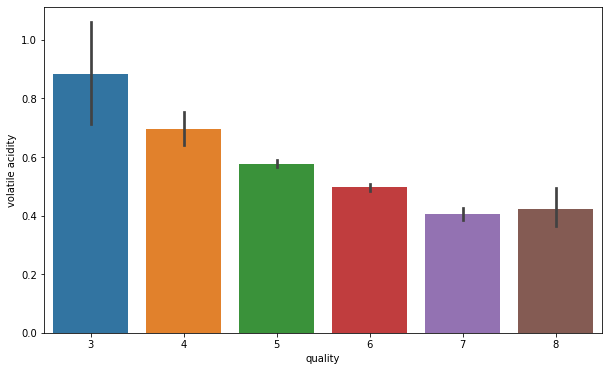

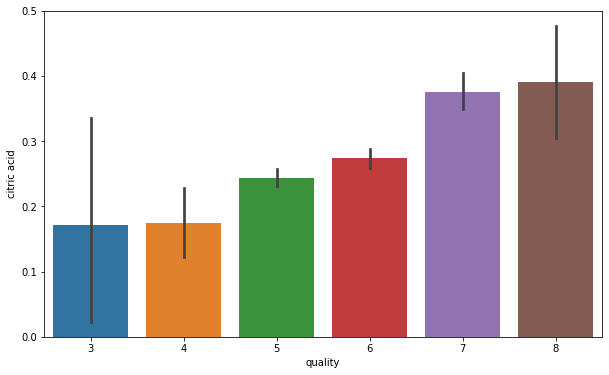

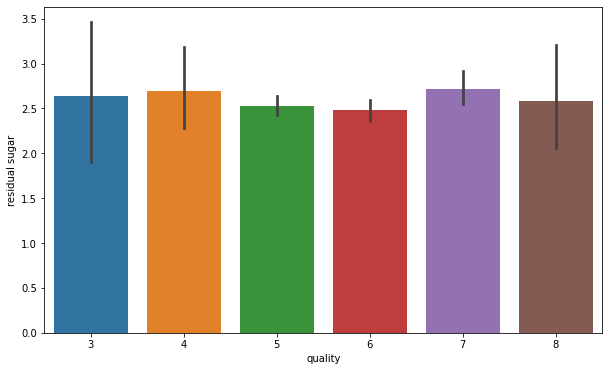

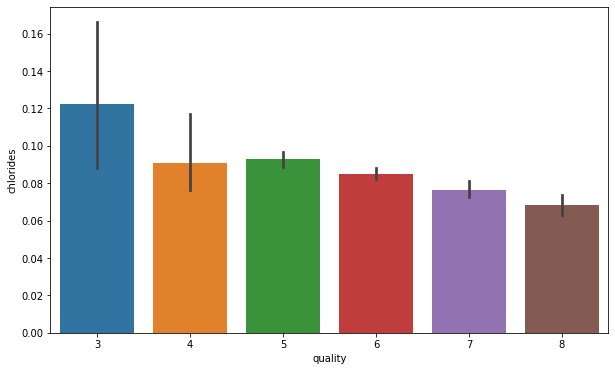

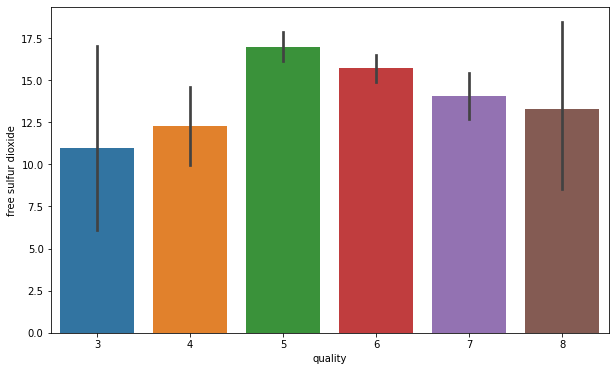

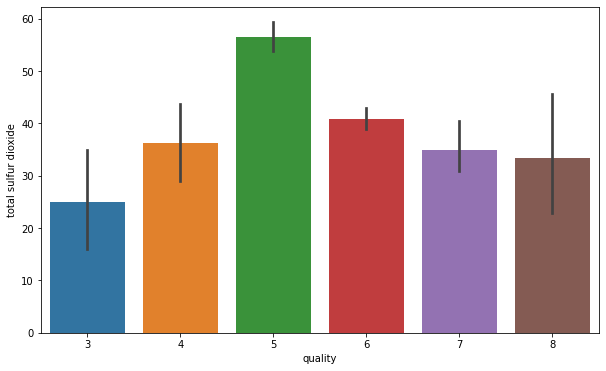

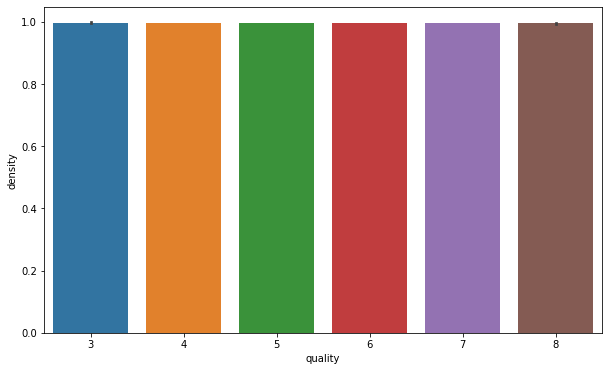

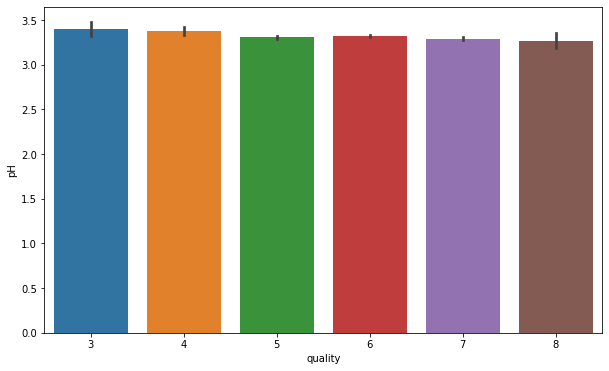

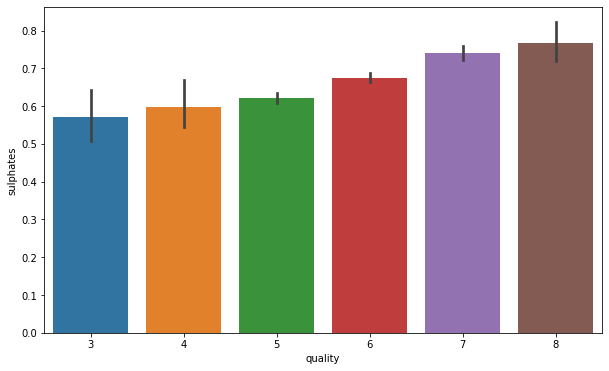

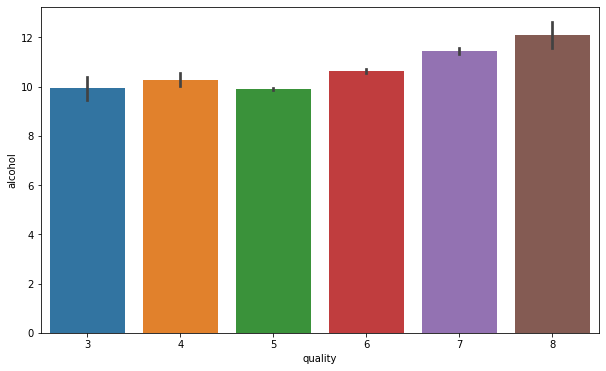

In [25]:
plot_(dataset=df, features=numerical_features)

### **Analysis on the plots**

Here there are a few things to note:

1. A higher alcohol content does increase the quality of the wine.
2. A greater sulphate content does mean that the wine has a greater quality.
3. A lower volatile acidity does mean a wine will have a greater quality.
4. A greater citric acid count indicates that the wine will have a better quality.
5. A lower chloride count shows the quality of the wine will be greater.

Next we will plot the correlation matrix to see how correlated these variables are.

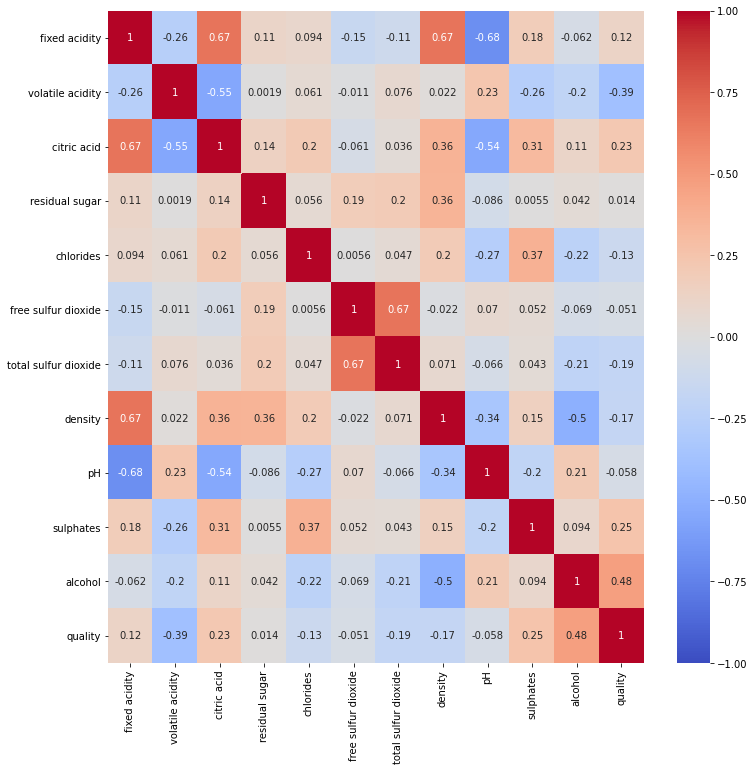

In [30]:
df_corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(df_corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

### **Correlation matrix findings:**

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation, for example, when the amount of sulphates in the wine goes up so does the quality of the wine. When the coefficient is close to –1, it means that there is a strong negative correlation, you can see a small negative correlation between the volatile acidity and the quality of wine. Finally, coefficients close to 0 mean that there is no linear correlation. 

From the correlation matrix we can see that the quality of the wine has a certain number of features that are having a negative or positive correlation with:

1. Alcohol
2. Sulphates
3. Citric acid 
4. Volatile Acidity 

Which does match our findings from the plotting of the variables!



## **Conclusion on data analysis**

These variables that are not correlated with the target variable can be dropped from the dataset as they do not play much of a role in determining the quality of wine but could reduce the accuracy of the model instead.

# **Model Selection** 

Here we have classes of wine quality ranging from 3-8 which indicates that we are dealing with a multiclass classification problem where we have to distinguish between more than two classes. Whereas in binary classifiers you would have to distinguish between two classes. 

Therefore we will be choosing the following models: 

1. Logistic Regression 
2. Non-linear Regression
3. Artificial Neural Networks(ANN)